In [1]:
# facial databases: http://www.face-rec.org/databases/
# data from: http://www.kasrl.org/jaffe.html
# https://github.com/ashishpatel26/Facial-Expression-Recognization-using-JAFFE
# KNN: https://github.com/nicolascerna/emotion-recognition-example

"""
p.s. the exception is that you may use/publish the representative images on the following page:

http://www.kasrl.org/jaffe.html

okay to use

KA.AN2.40
KA.FE1.45
KA.SU237
KA.HA2.30
KA.SA2.34
"""

'\np.s. the exception is that you may use/publish the representative images on the following page:\n\nhttp://www.kasrl.org/jaffe.html\n\nokay to use\n\nKA.AN2.40\nKA.FE1.45\nKA.SU237\nKA.HA2.30\nKA.SA2.34\n'

![copyright image](http://www.kasrl.org/KA.jpg)
KA.AN2.40

![copyright image](http://www.kasrl.org/KA_004.jpg)
KA.SU237

![copyright image](http://www.kasrl.org/KA_003.jpg)
KA.HA2.30

![copyright image](http://www.kasrl.org/KA_005.jpg)
KA.SA2.34

![copyright image](http://www.kasrl.org/KA_002.jpg)
KA.FE1.45

In [2]:
# TODO: data 정제, Label 정리

In [3]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
root = './jaffe/'
label = 'jaffe_labels.txt'

label_path = os.path.join(root, label)
with open(label_path, 'r') as f:
    print(f.readline())
    print(f.readline())
    for line in f:
        print(line)
        break

# HAP SAD SUR ANG DIS FEA PIC

--------------------------------------------------------------

1 2.87 2.52 2.10 1.97 1.97 2.06 KM-NE1



# Data modification

In [5]:
names = ['idx', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed', 'Fear', 'filename']
data = pd.read_csv(label_path, sep=" ", header=1, index_col=None, names=names)

In [6]:
data.head()

,idx,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename
0,1,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1
1,2,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2
2,3,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3
3,4,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1
4,5,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2


In [7]:
#NE가 들어간 경우 Neutral 이므로 새로운 column을 추가하고 점수를 5.0으로 매김(임의로) 

In [8]:
# column, name, value
try:
    data['Neutral']
except KeyError:
    data.insert(1, 'Neutral', 0.)

In [9]:
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename
0,1,0.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1
1,2,0.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2
2,3,0.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3
3,4,0.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1
4,5,0.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2


In [10]:
data.loc[data['filename'].str.contains('NE'), 'Neutral'] = 5.0

In [11]:
data.loc[~data['filename'].str.contains('NE'), 'Neutral'] = 1.0

In [12]:
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename
0,1,5.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1
1,2,5.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2
2,3,5.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3
3,4,1.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1
4,5,1.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2


In [13]:
# show columns
data.columns

Index(['idx', 'Neutral', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed',
       'Fear', 'filename'],
      dtype='object')

In [14]:
# relocate columns
_idx = ['idx', 'Neutral', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed', 'Fear', 'filename']
data = data[_idx]
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename
0,1,5.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1
1,2,5.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2
2,3,5.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3
3,4,1.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1
4,5,1.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2


In [15]:
data.iloc[0][1:8]

Neutral            5
Happy           2.87
Sad             2.52
Surprise         2.1
Angry           1.97
Disappointed    1.97
Fear            2.06
Name: 0, dtype: object

In [16]:
data.iloc[0][['Neutral', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed', 'Fear']]

Neutral            5
Happy           2.87
Sad             2.52
Surprise         2.1
Angry           1.97
Disappointed    1.97
Fear            2.06
Name: 0, dtype: object

# Set label Mask

In [17]:
label = {'Neutral': 0, 
         'Happy': 1, 
         'Sad': 2, 
         'Surprise': 3, 
         'Angry': 4, 
         'Disappointed': 5, 
         'Fear': 6
        }
f_label = {'NE': 0,
           'HA': 1,
           'SA': 2,
           'SU': 3,
           'AN': 4,
           'DI': 5,
           'FE': 6
          }
try:
    data['label']
except KeyError:
    data.insert(9, 'label', np.nan)

In [18]:
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,label
0,1,5.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,NaN
1,2,5.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,NaN
2,3,5.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,NaN
3,4,1.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,NaN
4,5,1.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,NaN


In [19]:
for idx, item in data.iterrows():
    max_label = item[item == item[1:8].max()].index[0]
    max_value = label.get(max_label)
    orig_label = item[-2][-3:-1]
    orig_value = f_label.get(orig_label)
    
    if max_value == orig_value:
        data.at[idx, 'label'] = max_value
    else:
        data.at[idx, 'label'] = orig_value
        print(idx)

22
24
40
45
46
47
66
68
69
87
88
89
90
103
105
107
110
111
125
126
131
151
152
153
168
173
174
175
195
196
197
206
207
215
216


In [20]:
data.tail()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,label
214,215,1.0,1.45,3.19,1.81,3.16,4.19,2.77,NA-DI2,5.0
215,216,1.0,1.43,2.87,1.77,4.33,3.87,2.10,NA-DI3,5.0
216,217,1.0,1.61,2.68,4.10,3.16,3.81,3.90,NA-FE1,6.0
217,218,1.0,1.68,3.10,3.74,3.19,3.58,3.87,NA-FE2,6.0
218,219,1.0,1.48,3.26,3.39,2.71,3.06,3.74,NA-FE3,6.0


# Separate X, y and train, test data

In [21]:
from sklearn.model_selection import train_test_split

# id 제외
X = data.loc[:, 'Neutral':'filename']
y = data.loc[:, 'label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [22]:
x_train.head()

,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename
77,1.0,1.42,4.26,1.74,2.52,3.06,2.48,KR-SA2
166,1.0,1.39,3.00,1.87,3.84,3.81,2.29,KL-AN1
107,1.0,2.61,2.39,1.74,2.00,2.39,1.94,NM-DI2
47,1.0,2.06,2.16,4.29,1.61,2.10,2.42,KA-FE4
89,1.0,1.61,2.39,3.97,3.19,3.71,2.74,KR-FE2


In [23]:
y_train.head()

77     2.0
166    4.0
107    5.0
47     6.0
89     6.0
Name: label, dtype: float64

In [24]:
print(len(y_train), len(y_test))

175 44


In [25]:
import cv2

In [26]:
def set_file_name(df_line):
    if isinstance(df_line, pd.core.series.Series):
        return df_line['filename'].replace('-', '.') + str('.') +  str(df_line.name + 1) + '.tiff'
    else:
        return df_line + '.tiff'

In [27]:
import matplotlib

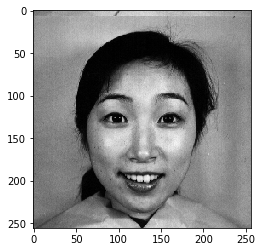

In [28]:
# show test image
imageFileName = set_file_name('KA.HA2.30')
imageToUse = cv2.imread(os.path.join(root, imageFileName))

plt.imshow(np.reshape(imageToUse, [256, 256, 3]), interpolation='nearest')

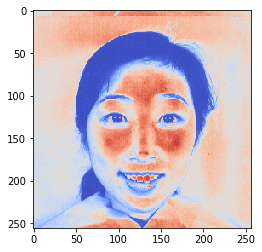

In [29]:
# from PIL import Image
# change colormapped

# Get the color map by name:
im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
cm = plt.cm.coolwarm

# Apply the colormap like a function to any array:
colored_image = cm(im_gray)

# Obtain a 4-channel image (R,G,B,A) in float [0, 1]
# But we want to convert to RGB in uint8 and save it:
m = (colored_image[:, :, :3] * 255).astype(np.uint8)
plt.imshow(m)

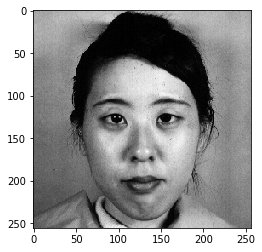

In [30]:
# show test image
idx = 4
imageFileName = set_file_name(x_test.iloc[idx])
imageToUse = cv2.imread(os.path.join(root, imageFileName))
plt.imshow(np.reshape(imageToUse, [256, 256, 3]), interpolation='nearest', cmap='gray')

In [31]:
imageToUse.shape

(256, 256, 3)

In [32]:
# load train_data
train_data = []
im_size = 128

for idx, item in x_train.iterrows():
    imageFileName = set_file_name(item)
    # color
#     imageToUse = cv2.imread(os.path.join(root, imageFileName))
    # gray
    imageToUse = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    
    newimg = cv2.resize(imageToUse, (im_size, im_size))
    train_data.append(newimg)

In [33]:
print(len(train_data))

175


In [34]:
type(train_data)

list

In [35]:
type(train_data[0][0][0])

numpy.uint8

In [36]:
# 핵심 로직: 데이터 타입을 uint8에서 float32로 변화시켜 정밀한 학습을 만든다
# print out image datatype
print(type(train_data[0][0][0]))

# change datatype uint8 to float32
train_data = np.array(train_data)
train_data = train_data.astype('float32')
train_data = train_data/255

# show image pixel datatype
print(train_data.shape)
print(type(train_data[0][0][0]))

<class 'numpy.uint8'>
(175, 128, 128)
<class 'numpy.float32'>


In [37]:
type(train_data[0][0][0])

numpy.float32

In [38]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(np.reshape(list(y_train), (-1, 1)))

c:\users\sogo\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [39]:
x_train.iloc[0]

Neutral              1
Happy             1.42
Sad               4.26
Surprise          1.74
Angry             2.52
Disappointed      3.06
Fear              2.48
filename        KR-SA2
Name: 77, dtype: object

In [40]:
y_train_hot = enc.transform(np.reshape(list(y_train), (-1, 1))).toarray()

In [41]:
y_train_hot.argmax(1)

array([2, 4, 5, 6, 6, 0, 0, 2, 0, 3, 6, 3, 4, 5, 1, 3, 2, 1, 5, 0, 1, 5,
       2, 5, 1, 4, 6, 5, 6, 1, 0, 1, 2, 1, 6, 2, 4, 0, 5, 0, 6, 4, 5, 6,
       3, 3, 3, 5, 1, 2, 2, 3, 6, 2, 5, 1, 6, 3, 5, 3, 0, 3, 2, 5, 0, 6,
       1, 5, 6, 6, 0, 5, 6, 1, 1, 6, 3, 0, 6, 2, 0, 6, 1, 5, 4, 4, 1, 2,
       3, 6, 2, 0, 1, 4, 2, 4, 4, 0, 5, 1, 3, 5, 3, 4, 5, 6, 3, 4, 0, 1,
       1, 6, 4, 0, 6, 2, 1, 0, 1, 3, 4, 0, 5, 5, 1, 5, 2, 0, 4, 6, 2, 3,
       6, 1, 3, 3, 3, 6, 2, 5, 4, 1, 4, 5, 0, 2, 2, 6, 2, 4, 4, 6, 0, 3,
       2, 3, 1, 1, 3, 4, 3, 4, 4, 0, 4, 2, 2, 0, 6, 1, 5, 1, 0, 3, 2],
      dtype=int64)

In [42]:
print(y_train_hot[0], len(y_train_hot[0]))

[0. 0. 1. 0. 0. 0. 0.] 7


# Train CNN

In [43]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

In [44]:
# set models
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, im_size, im_size],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 7],name="y-in")

x_image = tf.reshape(x, [-1, im_size, im_size, 1])

# hidden 1
hidden_1 = slim.conv2d(x_image, 6, [5, 5])
pool_1 = slim.max_pool2d(hidden_1, [2, 2])

# hidden 2
hidden_2 = slim.fully_connected(slim.flatten(pool_1), 294, activation_fn=tf.nn.relu)
out_y = slim.fully_connected(slim.flatten(hidden_2), 7, activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y * tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y, 1), tf.argmax(true_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [45]:
from IPython.display import clear_output, display
from time import sleep

In [46]:
# learning
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

jmp = 20
n_epoch = 50
for epoch in range(n_epoch):
    for i in range(0, 180, jmp):
        sess.run(train_step, feed_dict={x: train_data[i:i+jmp], 
                                        true_y: y_train_hot[i:i+jmp]})
        if i % jmp == 0 and i != 0:
            clear_output(wait=True)
            trainAccuracy = sess.run(accuracy, 
                                     feed_dict={x: train_data[i:i+jmp], 
                                                true_y: y_train_hot[i:i+jmp]})
            print("[epoch: {}] step {}, training accuracy {:.2%}".format(epoch, i, trainAccuracy))
            sleep(0.005)

[epoch: 49] step 160, training accuracy 100.00%


In [47]:
# load train_data
test_data = []

for idx, item in x_test.iterrows():
    imageFileName = set_file_name(item)
    # color
#     imageToUse = cv2.imread(os.path.join(root, imageFileName))
    # gray
    imageToUse = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(imageToUse, (im_size, im_size))
    test_data.append(newimg)

In [48]:
np.asarray(test_data).shape

(44, 128, 128)

In [49]:
# set y_test hot encoding
y_test_hot = enc.transform(np.reshape(list(y_test), (-1, 1))).toarray()

In [116]:
len(test_data)

44

In [50]:
print('Accuracy: {:.2%}'.format(sess.run(accuracy, 
                                         feed_dict={x: test_data, 
                                                    true_y: y_test_hot})))

Accuracy: 81.82%


# Predict One

0.00%		Neutral
100.00%		Happy
0.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


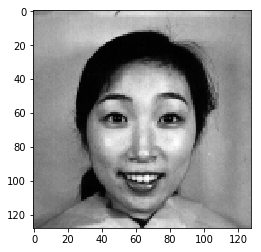

In [51]:
# KA.AN2.40
# KA.FE1.45
# KA.SU237
# KA.HA2.30
# KA.SA2.34

imageFileName = set_file_name('KA.HA2.30')
im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
plt.imshow(newimg, interpolation='nearest', cmap='gray')

emotion_label = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Angry',
    5: 'Disappointed',
    6: 'Fear'
}

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

# Decompose Variables

In [52]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'Conv/weights:0' shape=(5, 5, 1, 6) dtype=float32_ref>,
 <tf.Variable 'Conv/biases:0' shape=(6,) dtype=float32_ref>,
 <tf.Variable 'fully_connected/weights:0' shape=(24576, 294) dtype=float32_ref>,
 <tf.Variable 'fully_connected/biases:0' shape=(294,) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/weights:0' shape=(294, 7) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/biases:0' shape=(7,) dtype=float32_ref>]

In [53]:
layers = [hidden_1, pool_1, hidden_2]
weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')

In [54]:
layers

[<tf.Tensor 'Conv/Relu:0' shape=(?, 128, 128, 6) dtype=float32>,
 <tf.Tensor 'MaxPool2D/MaxPool:0' shape=(?, 64, 64, 6) dtype=float32>,
 <tf.Tensor 'fully_connected/Relu:0' shape=(?, 294) dtype=float32>]

In [55]:
weights

[<tf.Variable 'Conv/weights:0' shape=(5, 5, 1, 6) dtype=float32_ref>,
 <tf.Variable 'fully_connected/weights:0' shape=(24576, 294) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/weights:0' shape=(294, 7) dtype=float32_ref>]

In [56]:
biases

[<tf.Variable 'Conv/biases:0' shape=(6,) dtype=float32_ref>,
 <tf.Variable 'fully_connected/biases:0' shape=(294,) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/biases:0' shape=(7,) dtype=float32_ref>]

In [57]:
def getActivations(layer, image):
    units = sess.run(layer, feed_dict={x: np.reshape(image, (-1, im_size, im_size))})    
    return units

In [58]:
activations = []
for layer in layers:
    activations.append(getActivations(layer, newimg))

# Show LRP

In [59]:
from tensorflow.python.ops import gen_nn_ops

def backprop_dense(activation, weight, bias, relevance):
    w = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.matmul(activation, w) + b
    
    s = relevance / z
    c = tf.matmul(s, tf.transpose(w))
    return activation * c

def backprop_pooling(activation, relevance):
    # kernel size, strides
    # if z is zero
    ksize = strides = [1, 2, 2, 1]
    z = tf.nn.max_pool(activation, ksize, strides, padding='SAME') + 1e-10
    s = relevance / z
    c = gen_nn_ops._max_pool_grad(activation, z, s, ksize, strides, padding='SAME')
    # input, argmax, argmax_mask
    return activation * c

def backprop_conv(activation, weight, bias, relevance):
    strides = [1, 1, 1, 1]
    w = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.nn.conv2d(activation, w, strides, padding='SAME')
    z = tf.nn.bias_add(z, b)

    s = relevance / z
    c = tf.nn.conv2d_backprop_input(tf.shape(activation), w, s, strides, padding='SAME')
    return activation * c

# Get $f_x$

In [60]:
f_x = max(predict)
print(f_x)

1.0


# Get $R3 \leftarrow f_x$

In [61]:
predict[predict < 0] = 0
R3 = predict
R3.shape

(7,)

# Get $R2 \leftarrow R3 \leftarrow f_x$

In [62]:
_idx = -1
a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

R2 = backprop_dense(a.reshape(1, 294), w, b, R3)

print(R2.shape)

(1, 294)
(294, 7)
(1, 294)


# Get $R1 \leftarrow R2 \leftarrow R3 \leftarrow f_x$

In [63]:
_idx = -2

a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

# 24576 = 64 * 64 * 6
R1 = backprop_dense(a.reshape(1, 24576), w, b, R2)

print(R1.shape)

(1, 64, 64, 6)
(24576, 294)
(1, 24576)


# Get $R0 \leftarrow R1 \leftarrow R2 \leftarrow R3 \leftarrow f_x$

In [64]:
_idx = -3
print(activations[_idx].shape)
print(weights[_idx].shape)
print(biases[_idx].shape)
# max pool
a = activations[_idx]
R_p = backprop_pooling(a, tf.reshape(R1, (1, 64, 64, 6)))

# convolution
w = weights[_idx]
b = biases[_idx]
img_activations = getActivations(x_image, newimg)
R0 = backprop_conv(img_activations, w, b, R_p)
print(R0.shape)

# LRP out
LRP_out = sess.run(R0)
print(LRP_out.shape)

(1, 128, 128, 6)
(5, 5, 1, 6)
(6,)
(1, 128, 128, 1)
(1, 128, 128, 1)


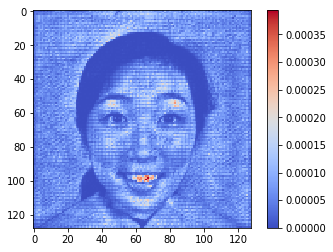

In [65]:
plt.imshow(LRP_out.reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='vertical')

# functionaize

In [69]:
def getLRP(img):
    predict = sess.run(out_y, feed_dict={x: np.reshape(img, (-1, im_size, im_size))})[0]
    
    layers = [hidden_1, pool_1, hidden_2]
    weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
    biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')
    
    # get activations
    activations = []
    for layer in layers:
        activations.append(getActivations(layer, img))
        
    # get f_x
    f_x = max(predict)
    
    # R3
    predict[predict < 0] = 0
    R3 = predict
    
    #R2
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()
    R2 = backprop_dense(a.reshape(1, 294), w, b, R3)
    
    # R1
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()

    # 24576 = 64 * 64 * 6
    R1 = backprop_dense(a.reshape(1, 24576), w, b, R2)
    
    # R0
    # max pool
    a = activations.pop()
    R_p = backprop_pooling(a, tf.reshape(R1, (1, 64, 64, 6)))

    # convolution
    w = weights.pop()
    b = biases.pop()
    img_activations = getActivations(x_image, newimg)
    R0 = backprop_conv(img_activations, w, b, R_p)
    
    # LRP_out
    LRP_out = sess.run(R0)
    return LRP_out

# plot LRP

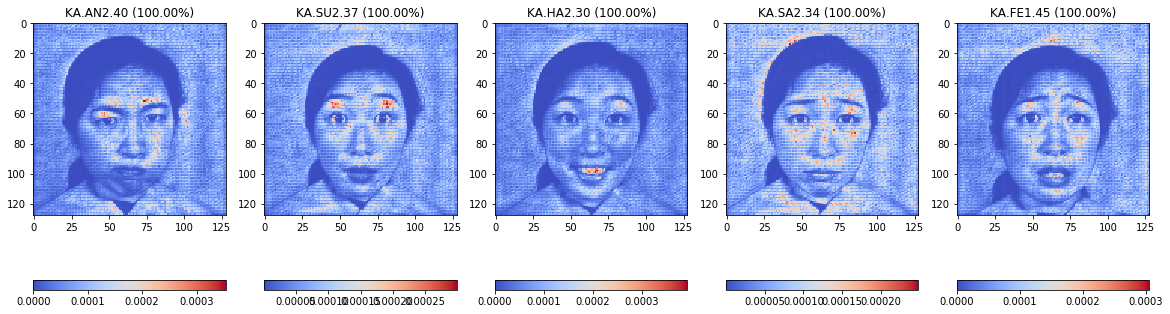

In [70]:
# KA.AN2.40
# KA.FE1.45
# KA.SU2.37
# KA.HA2.30
# KA.SA2.34
temp = ['KA.AN2.40', 'KA.SU2.37', 'KA.HA2.30', 'KA.SA2.34', 'KA.FE1.45']
# temp = ['KM.HA4.7', 'KL.HA2.159', 'KR.HA3.76', 'MK.HA3.118', 'NA.HA2.203']

plt.figure(figsize=(20, 8))

for i in range(len(temp)):
    plt.subplot(1, 5, i + 1)
    imageFileName = set_file_name(temp[i])
    
    im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(im_gray, (im_size, im_size))
    predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

    plt.title('{} ({:.2%})'.format(temp[i], np.max(predict)))
    plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
    plt.colorbar(orientation='horizontal')

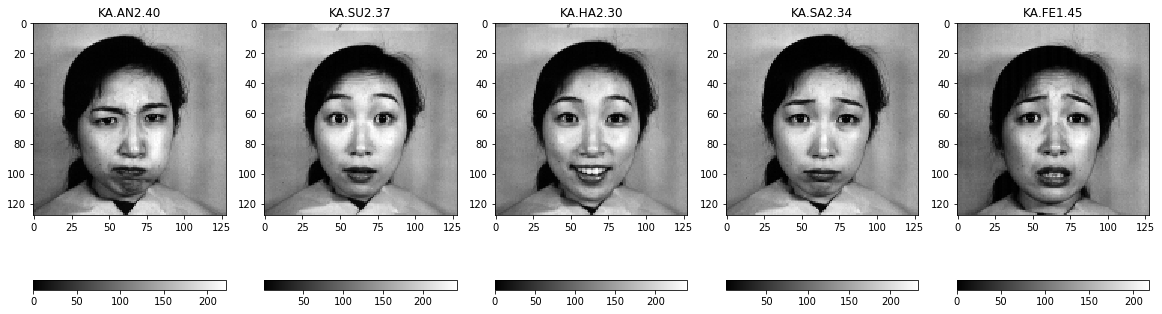

In [71]:
plt.figure(figsize=(20, 8))

for i in range(len(temp)):
    plt.subplot(1, 5, i + 1)
    plt.title(temp[i])
    imageFileName = set_file_name(temp[i])
    
    im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(im_gray, (im_size, im_size))
    plt.imshow(newimg.reshape(128, 128), interpolation='nearest', cmap=plt.cm.gist_gray)
    plt.colorbar(orientation='horizontal')

# Get Normal Image

In [72]:
# https://pixabay.com/ko/photos/%EC%96%B4%EB%A6%B0%EC%9D%B4-%EC%86%8C%EB%85%80-%EC%96%BC%EA%B5%B4-%EC%88%98%EA%B1%B4-666352/
# user: Pezibear, Commercial Use allowed

(953, 1105, 3)


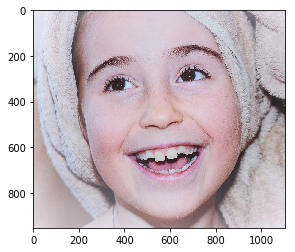

In [73]:
# show test image
_file_name = 'happy.jpg'
imageToUse = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_COLOR)
print(imageToUse.shape)
"""
OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.

The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
"""
imageToUse = cv2.cvtColor(imageToUse, cv2.COLOR_BGR2RGB)

# show original image
plt.imshow(np.reshape(imageToUse, imageToUse.shape), interpolation='nearest')

(128, 128)


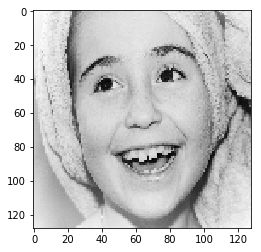

In [74]:
# convert grayscale image
im_gray = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
print(newimg.shape)
plt.imshow(np.reshape(newimg, [im_size, im_size]), interpolation='nearest', cmap=plt.cm.gist_gray)

0.00%		Neutral
100.00%		Happy
0.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


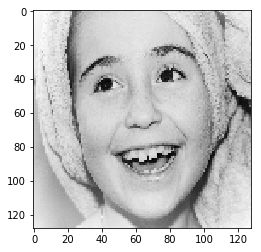

In [75]:
# predict
plt.imshow(newimg, interpolation='nearest', cmap='gray')

emotion_label = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Angry',
    5: 'Disappointed',
    6: 'Fear'
}

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

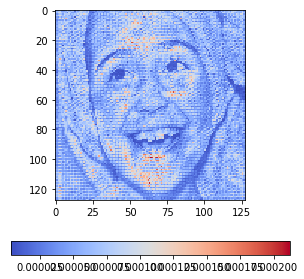

In [76]:
plt.figure(figsize=(5, 5))
plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='horizontal')

# Analysis another

In [77]:
# MarkoLovric, commercial use allowed

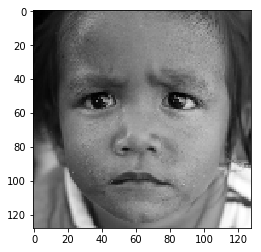

In [78]:
# convert grayscale image
_file_name = 'sad.jpg'
im_gray = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
plt.imshow(np.reshape(newimg, [im_size, im_size]), interpolation='nearest', cmap=plt.cm.gist_gray)

0.00%		Neutral
100.00%		Happy
0.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


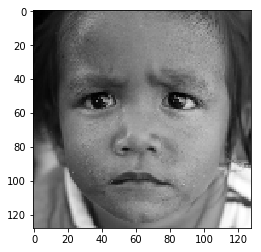

In [79]:
# predict
plt.imshow(newimg, interpolation='nearest', cmap='gray')

emotion_label = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Angry',
    5: 'Disappointed',
    6: 'Fear'
}

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

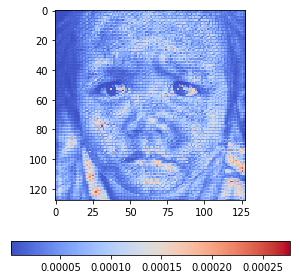

In [80]:
plt.figure(figsize=(5, 5))
plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='horizontal')

# Happy is not right Let's make another

In [81]:
sess.close()


tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, im_size, im_size],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 7],name="y-in")

x_image = tf.reshape(x, [-1, im_size, im_size, 1])

# layer 1
hidden_1 = slim.conv2d(x_image, 6, [5, 5])
pool_1 = slim.max_pool2d(hidden_1, [2, 2])

# layer 2
hidden_2 = slim.conv2d(pool_1, 16, [5, 5])
pool_2 = slim.max_pool2d(hidden_2, [2, 2])

# layer 3
hidden_3 = slim.conv2d(pool_2, 120, [5, 5])

hidden_4 = slim.fully_connected(slim.flatten(hidden_3), 42, activation_fn=tf.nn.relu)
out_y = slim.fully_connected(slim.flatten(hidden_4), 7, activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y * tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y, 1), tf.argmax(true_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [82]:
# learning
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

jmp = 20
n_epoch = 100
for epoch in range(n_epoch):
    for i in range(0, 180, jmp):
        sess.run(train_step, feed_dict={x: train_data[i:i+jmp], 
                                        true_y: y_train_hot[i:i+jmp]})
        if i % jmp == 0 and i != 0:
            clear_output(wait=True)
            trainAccuracy = sess.run(accuracy, 
                                     feed_dict={x: train_data[i:i+jmp], 
                                                true_y: y_train_hot[i:i+jmp]})
            print("[epoch: {}] step {}, training accuracy {:.2%}".format(epoch, i, trainAccuracy))
            sleep(0.005)

[epoch: 99] step 160, training accuracy 100.00%


In [83]:
# load train_data
test_data = []

for idx, item in x_test.iterrows():
    imageFileName = set_file_name(item)
    # color
#     imageToUse = cv2.imread(os.path.join(root, imageFileName))
    # gray
    imageToUse = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(imageToUse, (im_size, im_size))
    test_data.append(newimg)

In [84]:
np.asarray(test_data).shape

(44, 128, 128)

In [85]:
# set y_test hot encoding
y_test_hot = enc.transform(np.reshape(list(y_test), (-1, 1))).toarray()

In [86]:
print('Accuracy: {:.2%}'.format(sess.run(accuracy, 
                                         feed_dict={x: test_data, 
                                                    true_y: y_test_hot})))

Accuracy: 86.36%


# Decompose variables

0.00%		Neutral
0.00%		Happy
0.00%		Sad
0.00%		Surprise
100.00%		Angry
0.00%		Disappointed
0.00%		Fear


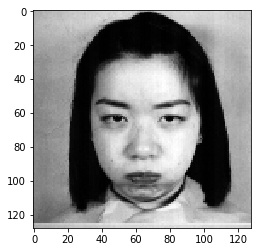

In [99]:
plt.imshow(newimg, interpolation='nearest', cmap='gray')
# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

In [87]:
layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3, hidden_4]
weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')

In [88]:
activations = []
for layer in layers:
    activations.append(getActivations(layer, newimg))

In [90]:
# f_x
f_x = max(predict)
print(f_x)

# R5
predict[predict < 0] = 0
R5 = predict
R5.shape

1.0


(7,)

In [91]:
# R4
_idx = -1
a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

R4 = backprop_dense(a.reshape(1, 42), w, b, R5)

print(R4.shape)

(1, 42)
(42, 7)
(1, 42)


In [92]:
# R3 
_idx = -2

a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

# 122880 = 32 * 32 * 120
R3 = backprop_dense(a.reshape(1, 122880), w, b, R4)

print(R3.shape)

(1, 32, 32, 120)
(122880, 42)
(1, 122880)


In [93]:
# R2
_idx = -3
w = weights[_idx]
b = biases[_idx]
p = activations[_idx]

print(p.shape)
print(w.shape)

# convolution backprop
R_conv = backprop_conv(p, w, b, tf.reshape(R3, [1, 32, 32, 120]))
print(R_conv.shape)

_idx = -4
a = activations[_idx]

R2 = backprop_pooling(a, R_conv)
print(R2.shape)

(1, 32, 32, 16)
(5, 5, 16, 120)
(1, 32, 32, 16)
(1, 64, 64, 16)


In [94]:
# R1
_idx = -4
w = weights[_idx]
b = biases[_idx]
_idx = -5
p = activations[_idx]

print(p.shape)
print(w.shape)

# convolution backprop
R_conv = backprop_conv(p, w, b, tf.reshape(R2, [1, 64, 64, 16]))
print(R_conv.shape)

_idx = -6
a = activations[_idx]

R1 = backprop_pooling(a, R_conv)
print(R1.shape)

(1, 64, 64, 6)
(5, 5, 6, 16)
(1, 64, 64, 6)
(1, 128, 128, 6)


In [95]:
# img
img_activations = getActivations(x_image, newimg)

_idx = -5
w = weights[_idx]
b = biases[_idx]

R0 = backprop_conv(img_activations, w, b, R1)
print(R0.shape)
LRP_out = sess.run(R0)
print(LRP_out.shape)

(1, 128, 128, 1)
(1, 128, 128, 1)


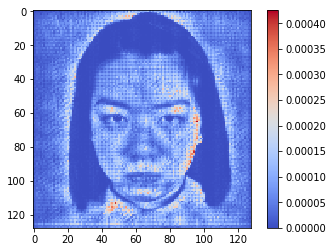

In [96]:
plt.imshow(LRP_out.reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='vertical')

0.00%		Neutral
0.00%		Happy
100.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


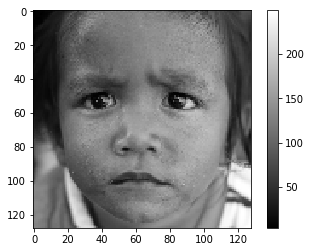

In [105]:
_file_name = 'sad.jpg'
im_gray = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
plt.imshow(newimg, interpolation="nearest", cmap=plt.cm.gist_gray)
plt.colorbar(orientation='vertical')

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1
# correct. beause of the Translation invarient

In [114]:
def getLRP(img):
    predict = sess.run(out_y, feed_dict={x: np.reshape(img, (-1, im_size, im_size))})[0]
    
    layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3, hidden_4]
    weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
    biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')
    
    # get activations
    activations = []
    for layer in layers:
        activations.append(getActivations(layer, img))
        
    # get f_x
    f_x = max(predict)
    
    # R5
    predict[predict < 0] = 0
    R5 = predict
    
    #R4, FC
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()
    R4 = backprop_dense(a.reshape(1, 42), w, b, R5)
    
    # R3, FC
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()
    # 122880 = 32 * 32 * 120
    R3 = backprop_dense(a.reshape(1, 122880), w, b, R4)
    
    # R2, CONV
    w = weights.pop()
    b = biases.pop()
    p = activations.pop()
    # convolution backprop
    R_conv = backprop_conv(p, w, b, tf.reshape(R3, [1, 32, 32, 120]))
    a = activations.pop()
    # R2, POOL
    R2 = backprop_pooling(a, R_conv)
    
    # R1
    w = weights.pop()
    b = biases.pop()
    p = activations.pop()
    # R1, CONV
    R_conv = backprop_conv(p, w, b, tf.reshape(R2, [1, 64, 64, 16]))
    a = activations.pop()
    # R1, POOL
    R1 = backprop_pooling(a, R_conv)
    
    # R0
    img_activations = getActivations(x_image, newimg)
    w = weights.pop()
    b = biases.pop()
    # R0, CONV
    R0 = backprop_conv(img_activations, w, b, R1)
    LRP_out = sess.run(R0)
    return LRP_out

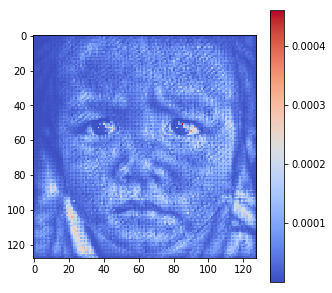

In [115]:
# plot LRP
plt.figure(figsize=(5, 5))
plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='vertical')